# Domain Uncertainty

## In Domain Uncertainty
In-domain uncertainty represents the uncertainty related to inputs drawn from a distribution believed to be equal to the training data distribution. Thus, any uncertainty from in-domain inputs result from our model's inability to properly understand an in-domain sample, indicating a design error in our model choice (model uncertainty), or the complexity of the problem (data uncertainty). In this tutorial we train on all the numbers, establishing numbers 0-9 as "in domain", and test on those same numbers to show in domain uncertainty.

[1]

In [1]:
import torch
import copy
import os
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
from experiments.nns.bdl import SelectMNISTDataset

# Define the path to directory containing MNIST
mnist_directory = os.path.abspath(os.path.join(os.path.dirname(os.path.abspath("uncertainty.ipynb")), "..","..","..","..","..","..","..", "/usr/data1/vision/data/"))


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

in_domain = [0,1,2,3,4,5,6,7,8,9]
# Load the MNIST training dataset
# def __init__(self, root, numbers=[0, 1], train=False, transform=None, limit=None):
train_dataset = SelectMNISTDataset(root=mnist_directory, train=True, numbers = in_domain, num_entries_per_digit=1000, transform=transform)

In [ ]:
import torch
from torch.utils.data import DataLoader
import push.bayes.ensemble
from experiments.nns.lenet.lenet import LeNet


# Create data loaders
batch_size = 100
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
epochs = 100

ensemble = push.bayes.ensemble.train_deep_ensemble(
        train_loader,
        torch.nn.CrossEntropyLoss(),
        epochs,
        LeNet,
        num_devices=2,
        num_ensembles=100,
        cache_size=25
    )

100%|██████████| 50/50 [00:35<00:00,  1.40it/s, loss=tensor(0.1247)]


In [ ]:
test_dataset = SelectMNISTDataset(root=mnist_directory, train=False, numbers = [0,1,2,3,4,5,6,7,8,9], num_entries_per_digit=100, transform=transform)
test_batch_size=100
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

In [ ]:
outputs = ensemble.posterior_pred(test_loader, f_reg=False, mode=["mode","logits", "prob", "std"])

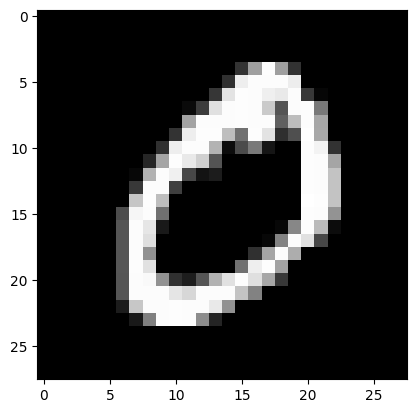

In [ ]:
# Display rotated images
# num_images_to_display = 
import matplotlib.pyplot as plt

def get_image(number_to_display, dataloader, batch_size):
    number_to_display = number_to_display
    cur_batch = 0
    idx = 0
    for images, labels in test_loader:
        img = images[idx]
        lbl = labels[idx]
        if cur_batch == number_to_display:
            return img
        cur_batch += 1

number_to_display = 0
img = get_image(number_to_display, test_loader, test_batch_size)
idx_image = test_batch_size * number_to_display
plt.imshow(img.squeeze(), cmap='gray')

Trained on all numbers, testing on 9

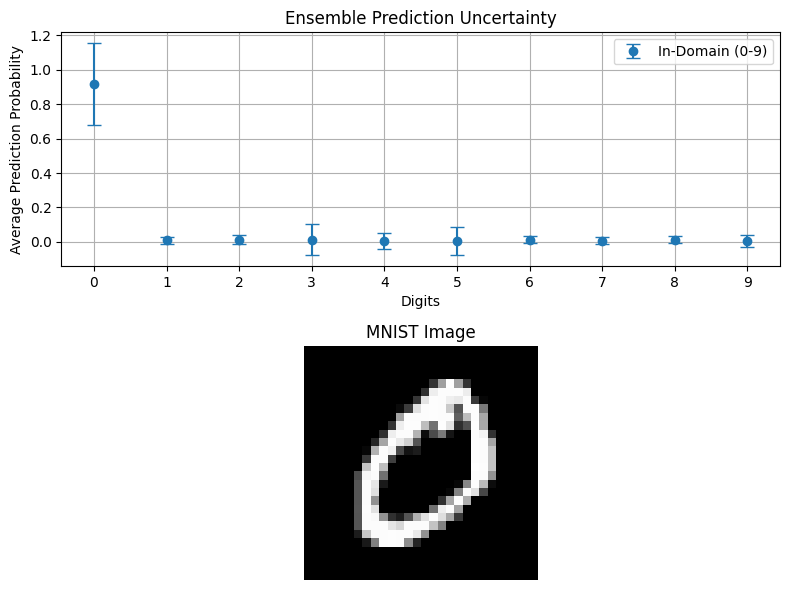

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Sample average prediction probabilities and standard deviations
digits = np.arange(10)  # Digits 0-9
# avg_probs = np.array([0.92, 0.91, 0.93, 0.94, 0.92, 0.95, 0.94, 0.92, 0.93, 0.6])  # Sample average probs
# std_devs = np.array([0.03, 0.02, 0.03, 0.02, 0.03, 0.02, 0.03, 0.03, 0.03, 0.1])  # Sample std devs
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
# Plotting
plt.errorbar(digits, torch.mean(outputs["prob"], dim=1).squeeze()[idx_image], yerr=outputs["std"][idx_image], fmt='o', capsize=5, label='In-Domain (0-9)')
# plt.scatter(9, 0.6, color='red', label='Out-of-Domain (9)')

plt.xticks(digits)
plt.xlabel('Digits')
plt.ylabel('Average Prediction Probability')
plt.title('Ensemble Prediction Uncertainty')
plt.legend()
plt.grid(True)

# Second subplot for the MNIST image
plt.subplot(2, 1, 2)
plt.imshow(img.squeeze(), cmap='gray')
plt.axis('off')  # Remove axis
plt.title('MNIST Image')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

## Out of Domain Uncertainty
Out of domain uncertainty represents the uncertainty related to inputs drawn from the subspace of unknown data. In this tutorial we examine the MNIST dataset, and train on set of numbers 1-8, establishing our "in-domain" as the numbers 1-8. By testing on the number 9, an out of domain input, we can determine how uncertain our model is when encountering data it is not equipped to handle.

[1]

### Dataset

In [ ]:
import torch
import copy
import os
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
from experiments.nns.bdl import SelectMNISTDataset

# Define the path to directory containing MNIST
mnist_directory = os.path.abspath(os.path.join(os.path.dirname(os.path.abspath("uncertainty.ipynb")), "..","..","..","..","..","..","..", "/usr/data1/vision/data/"))


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

in_domain = [0,2,4,6,8]
out_domain = [1,3,5,7,9]
# Load the MNIST training dataset
# def __init__(self, root, numbers=[0, 1], train=False, transform=None, limit=None):
train_dataset = SelectMNISTDataset(root=mnist_directory, train=True, numbers = in_domain, num_entries_per_digit=100, transform=transform)

In [ ]:
import torch
from torch.utils.data import DataLoader
import push.bayes.ensemble
from experiments.nns.lenet.lenet import LeNet


# Create data loaders
batch_size = 100
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
epochs = 100

ensemble = push.bayes.ensemble.train_deep_ensemble(
        train_loader,
        torch.nn.CrossEntropyLoss(),
        epochs,
        LeNet,
        num_devices=2,
        num_ensembles=100,
        cache_size=25
    )

100%|██████████| 50/50 [02:47<00:00,  3.36s/it, loss=tensor(0.0307)]


In [ ]:
test_dataset = SelectMNISTDataset(root=mnist_directory, train=False, numbers = [0,1,2,3,4,5,6,7,8,9], num_entries_per_digit=100, transform=transform)
test_batch_size = 100
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

In [ ]:
outputs = ensemble.posterior_pred(test_loader, f_reg=False, mode=["mode","logits","prob", "std"])


Trained on numbers 0-8, testing on number 9 image

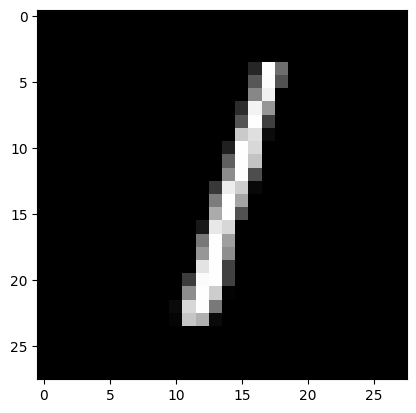

In [ ]:
# Display rotated images
# num_images_to_display = 
import matplotlib.pyplot as plt

def get_image(number_to_display, dataloader, batch_size):
    number_to_display = number_to_display
    cur_batch = 0
    idx = 0
    for images, labels in test_loader:
        img = images[idx]
        lbl = labels[idx]
        if cur_batch == number_to_display:
            return img
        cur_batch += 1

number_to_display = 1
img = get_image(number_to_display, test_loader, test_batch_size)
idx_image = test_batch_size * number_to_display
plt.imshow(img.squeeze(), cmap='gray')

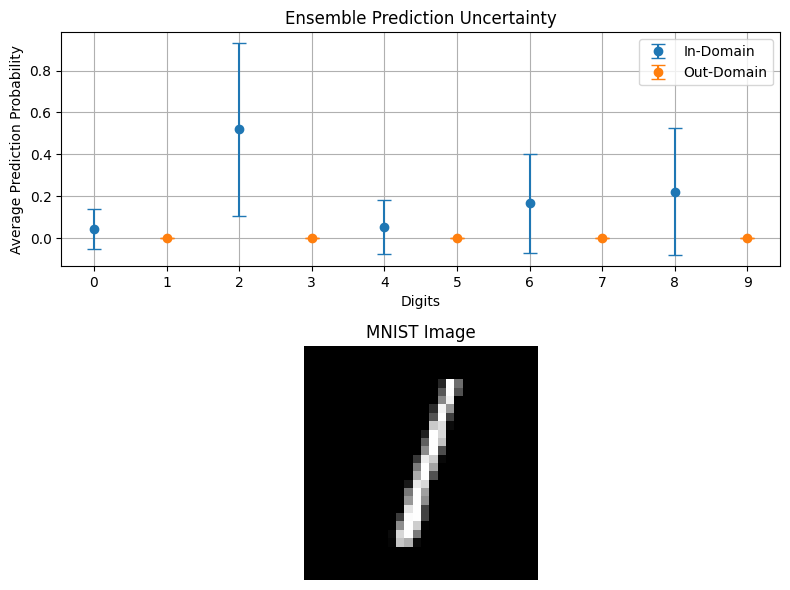

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Sample average prediction probabilities and standard deviations
# digits = np.arange(10)  # Digits 0-9
plt.figure(figsize=(8, 6))
digits = np.arange(10)
# avg_probs = np.array([0.92, 0.91, 0.93, 0.94, 0.92, 0.95, 0.94, 0.92, 0.93, 0.6])  # Sample average probs
# std_devs = np.array([0.03, 0.02, 0.03, 0.02, 0.03, 0.02, 0.03, 0.03, 0.03, 0.1])  # Sample std devs
plt.subplot(2, 1, 1)
# Plotting
plt.errorbar(in_domain, torch.mean(outputs["prob"], dim=1).squeeze()[idx_image][in_domain], yerr=outputs["std"][idx_image][in_domain], fmt='o', capsize=5, label="In-Domain")
plt.errorbar(out_domain, torch.mean(outputs["prob"], dim=1).squeeze()[idx_image][out_domain], yerr=outputs["std"][idx_image][out_domain], fmt='o', capsize=5, label ="Out-Domain")

# plt.errorbar(digits[:-1], torch.mean(outputs["prob"], dim=1).squeeze()[9][:-1], yerr=outputs["std"][9][:-1], fmt='o', capsize=5, label='In-Domain (0-8)')
# plt.errorbar(9, torch.mean(outputs["prob"], dim=1).squeeze()[9][-1], yerr=outputs["std"][9][-1], fmt='o', capsize=5, label='Out-Domain (9)')
# plt.scatter(9, 0.6, color='red', label='Out-of-Domain (9)')

plt.xticks(digits)
plt.xlabel('Digits')
plt.ylabel('Average Prediction Probability')
plt.title('Ensemble Prediction Uncertainty')
plt.legend()
plt.grid(True)


# Second subplot for the MNIST image
plt.subplot(2, 1, 2)
plt.imshow(img.squeeze(), cmap='gray')
plt.axis('off')  # Remove axis
plt.title('MNIST Image')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

plt.show()

We can see that the model's most probable prediction (4) has a very high degree of uncertainty, demonstrated by its very large standard deviation.

Furthermore, we can visualize the entropy of our predictions for out of domain and in domain samples. 

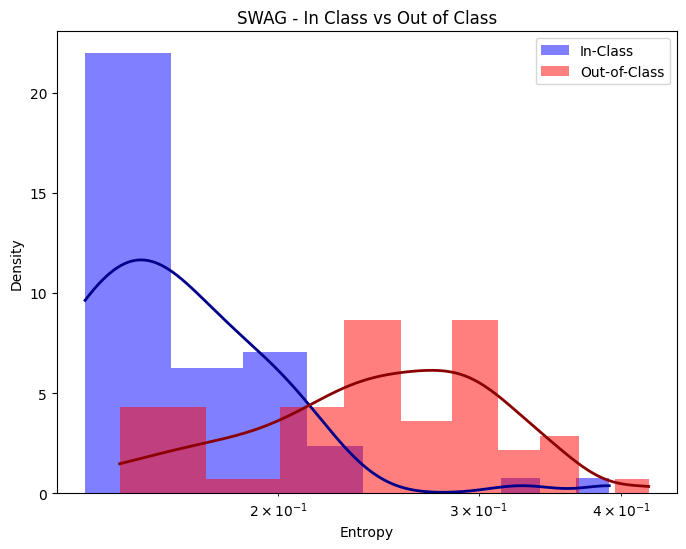

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define which labels are considered in-class
in_class_labels = torch.tensor(in_domain)  # Update this list as needed

# Extract probabilities and predicted classes
probabilities = outputs['prob']
predicted_classes = outputs['mode']

filtered_probabilities = probabilities[:, :, in_domain_indices]

# Calculate predictive entropy for the filtered in-domain probabilities
# Adjust the calculation to work with the multi-model setup
entropies = -(filtered_probabilities * torch.log(filtered_probabilities + 1e-10)).sum(dim=2)


# entropies = -(probabilities * torch.log(probabilities + 1e-10)).sum(dim=2)

# Average entropy across all models for each sample
average_entropy = entropies.mean(dim=1)

# Get true labels (assuming the test_loader has dataset with true labels as the second element)
true_labels = torch.tensor([label for _, label in test_dataset])

# # Classify predictions as in-class or out-of-class based on specified labels
in_class = torch.isin(true_labels, in_class_labels)
out_of_class = ~in_class
# print("true_labels: ", true_labels)
# print("out of class", out_of_class)

# # Convert entropy to NumPy for plotting
entropy_np = average_entropy.numpy()
entropy_in_class_np = entropy_np[in_class.numpy()]
entropy_out_of_class_np = entropy_np[out_of_class.numpy()]


plt.figure(figsize=(8, 6))

# Plot in-class histogram and KDE
if entropy_in_class_np.size > 0:
    hist_in_class = plt.hist(entropy_in_class_np, bins=10, density=True, alpha=0.5, color='blue', label='In-Class')
    density_in_class = gaussian_kde(entropy_in_class_np)
    entropy_values_in_class = np.linspace(hist_in_class[1].min(), hist_in_class[1].max(), 1000)
    plt.plot(entropy_values_in_class, density_in_class(entropy_values_in_class), color='darkblue', linewidth=2)

# Plot out-of-class histogram and KDE with adjustments
if entropy_out_of_class_np.size > 0:
    hist_out_of_class = plt.hist(entropy_out_of_class_np, bins=10, density=True, alpha=0.5, color='red', label='Out-of-Class')
    density_out_of_class = gaussian_kde(entropy_out_of_class_np)
    entropy_values_out_of_class = np.linspace(hist_out_of_class[1].min(), hist_out_of_class[1].max(), 1000)
    plt.plot(entropy_values_out_of_class, density_out_of_class(entropy_values_out_of_class), color='darkred', linewidth=2)

plt.xscale('log')
plt.xlabel('Entropy')
plt.ylabel('Density')
plt.title('SWAG - In Class vs Out of Class')
plt.legend()
plt.show()


[2]

References 

[1] Gawlikowski, J., Njieutcheu Tassi, C. R., Ali, M., Lee, J., Humt, M., Feng, J., Kruspe, A., Triebel, R., Jung, P., Roscher, R., Shahzad, M., Yang, W., Bamler, R., & Zhu, X. X. (2022). A Survey of Uncertainty in Deep Neural Networks. arXiv preprint arXiv:2107.03342.

[2] Maddox, W. J., Garipov, T., Izmailov, P., Vetrov, D., & Wilson, A. G. (2019). A simple baseline for Bayesian uncertainty in deep learning. In Proceedings of the 33rd Conference on Neural Information Processing Systems (NeurIPS 2019) (pp. [20]). Vancouver, Canada: New York University; Samsung AI Center Moscow; Samsung-HSE Laboratory, National Research University Higher School of Economics.